 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
csv_path = Path("../Starter_Code/Resources/whale_returns.csv")

whale_df = pd.read_csv(csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_df.sort_index(inplace=True)
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
csv_path2 = Path("../Starter_Code/Resources/algo_returns.csv")
algo_df = pd.read_csv(csv_path2, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_df.sort_index(inplace=True)
algo_df

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [6]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df.dropna(inplace=True)

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
csv_path3 = Path("../Starter_Code/Resources/sp500_history.csv")
sp500_df = pd.read_csv(csv_path3, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_df.sort_index(inplace=True)
sp500_df

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03


In [9]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")
sp500_df["Close"] = sp500_df["Close"].astype("float")
sp500_df.head()

<ipython-input-10-ed8812c20e5a>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [11]:
# Calculate Daily Returns
sp_daily_returns = sp500_df.pct_change()
sp_daily_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [12]:
# Drop nulls
sp_daily_returns.dropna(inplace=True)

In [13]:
# Rename `Close` Column to be specific to this portfolio.
#sp_daily_returns.columns["Close", "S&P 500"]
sp500_df_new = sp_daily_returns.rename(columns={'Close': 'S&P 500'})


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns_df = pd.concat([whale_df, algo_df, sp500_df_new], axis = "columns", join = "inner")
combined_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

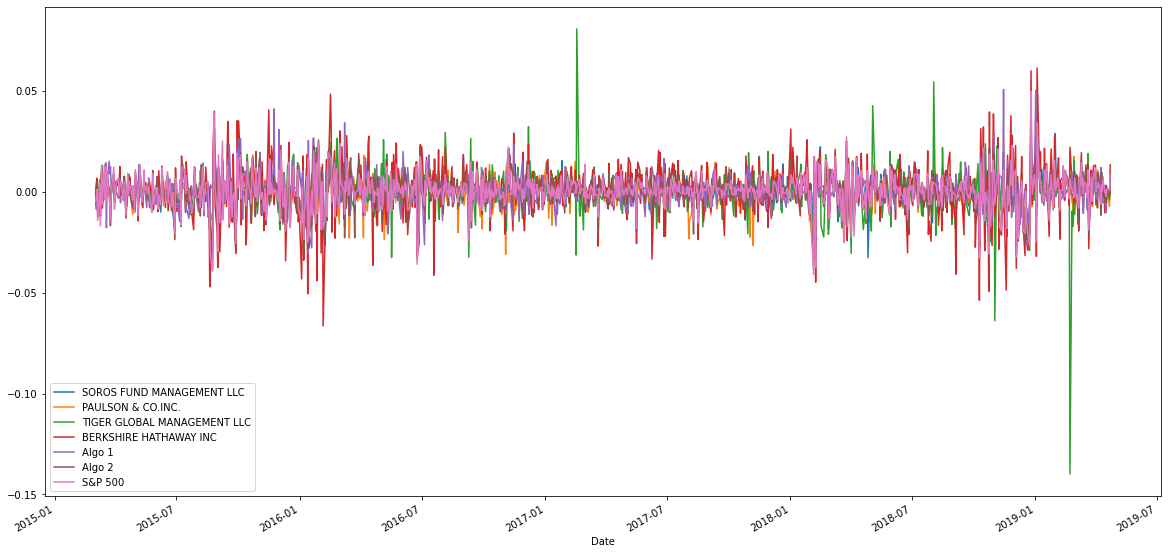

In [15]:
# Plot daily returns of all portfolios
combined_returns_df.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

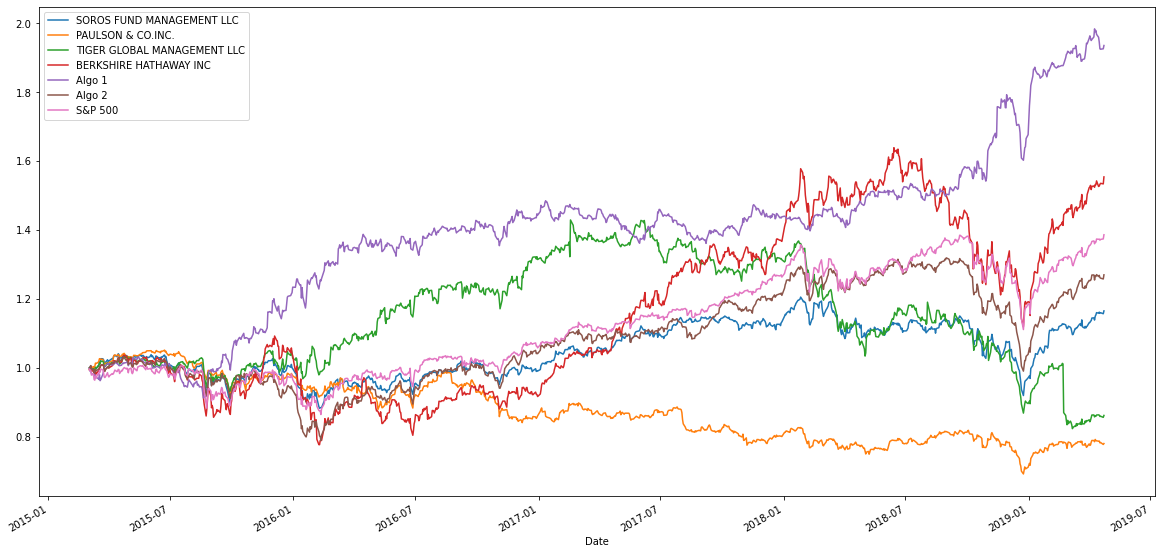

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns_df).cumprod() 
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

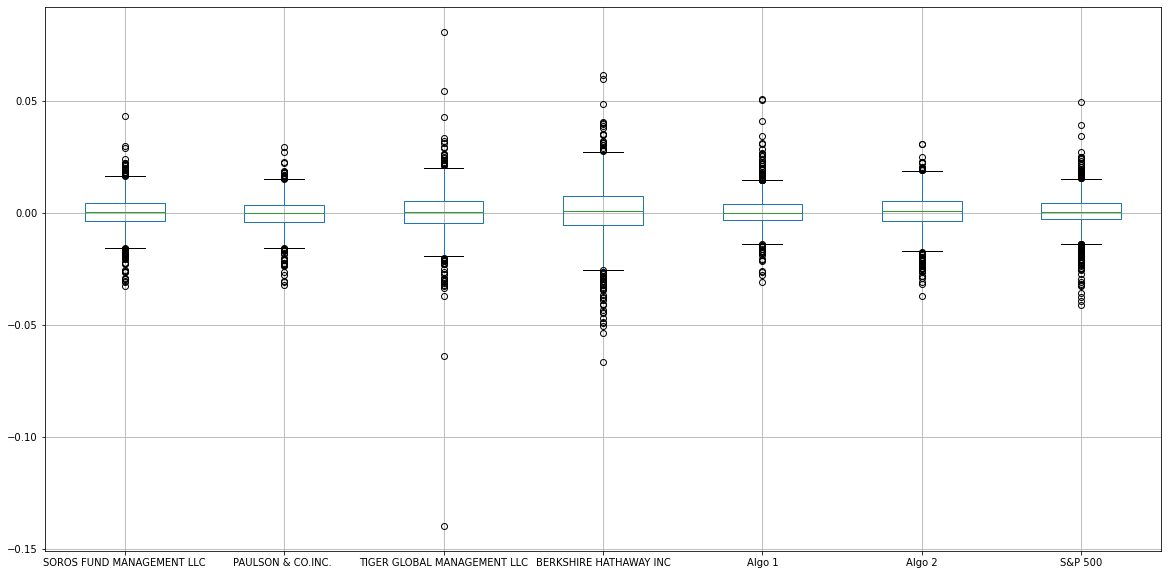

In [17]:
# Box plot to visually show risk
combined_returns_df.boxplot(figsize=(20,10))


### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
combined_returns_df.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500
sp500_risk = combined_returns_df["S&P 500"].std()

# Determine which portfolios are riskier than the S&P 500
combined_returns_df.std()>sp500_risk

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
combined_returns_df.std()*np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

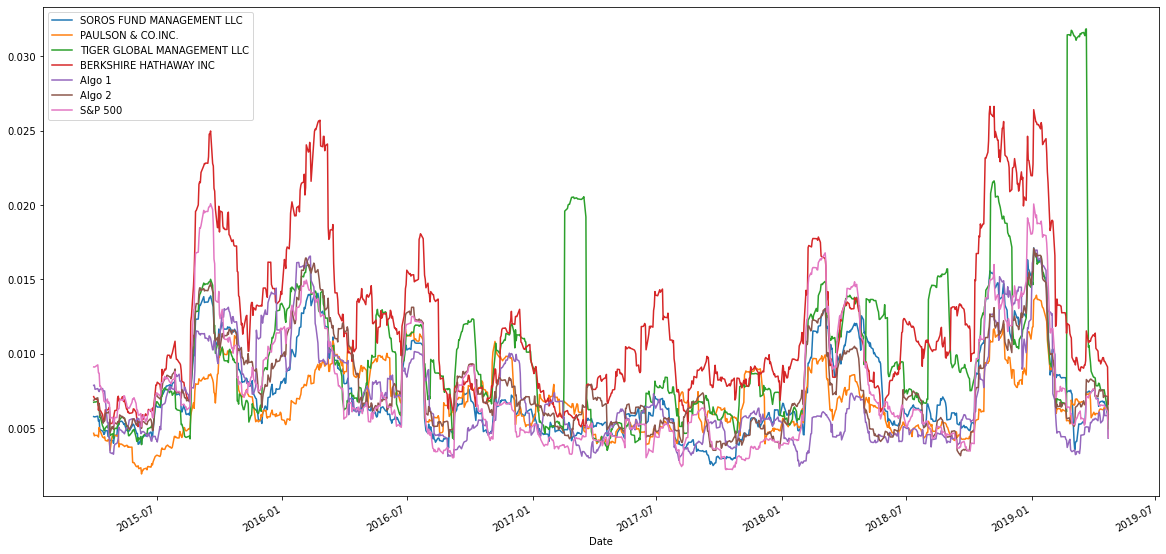

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation
combined_returns_df.rolling(window=21).std().plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

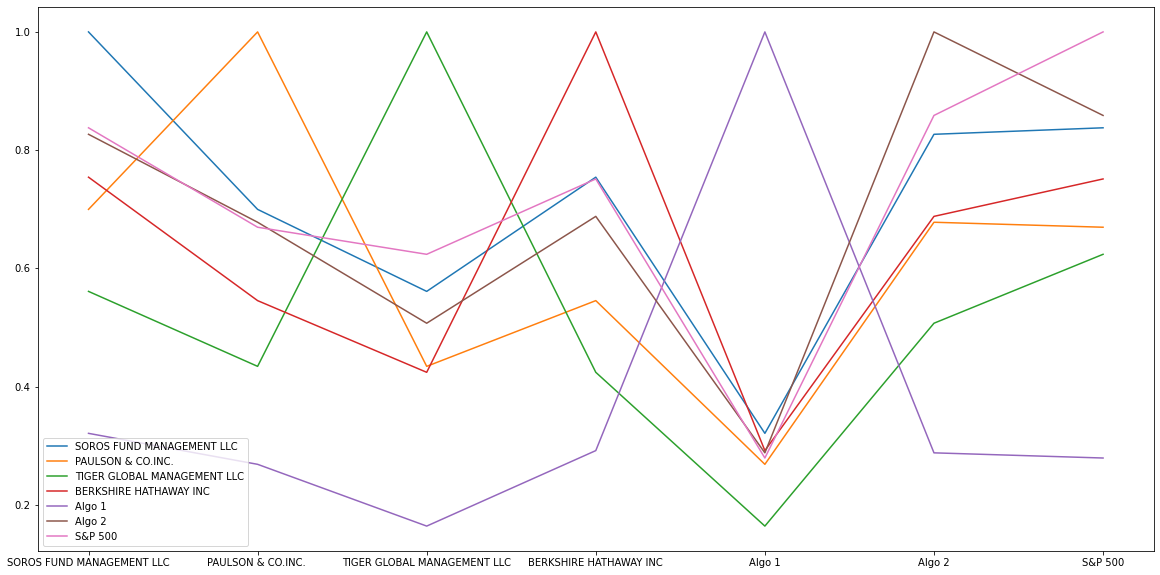

In [22]:
# Calculate the correlation
correlation_df = combined_returns_df.corr()
# Display de correlation matrix
correlation_df.plot(figsize=(20,10))

<AxesSubplot:>

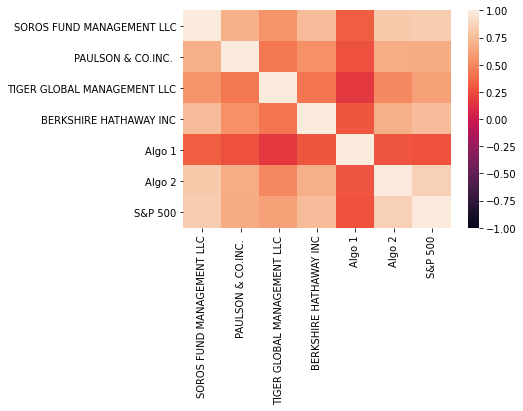

In [23]:
# Display correlation matrix as a heatmap
sns.heatmap(correlation_df, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

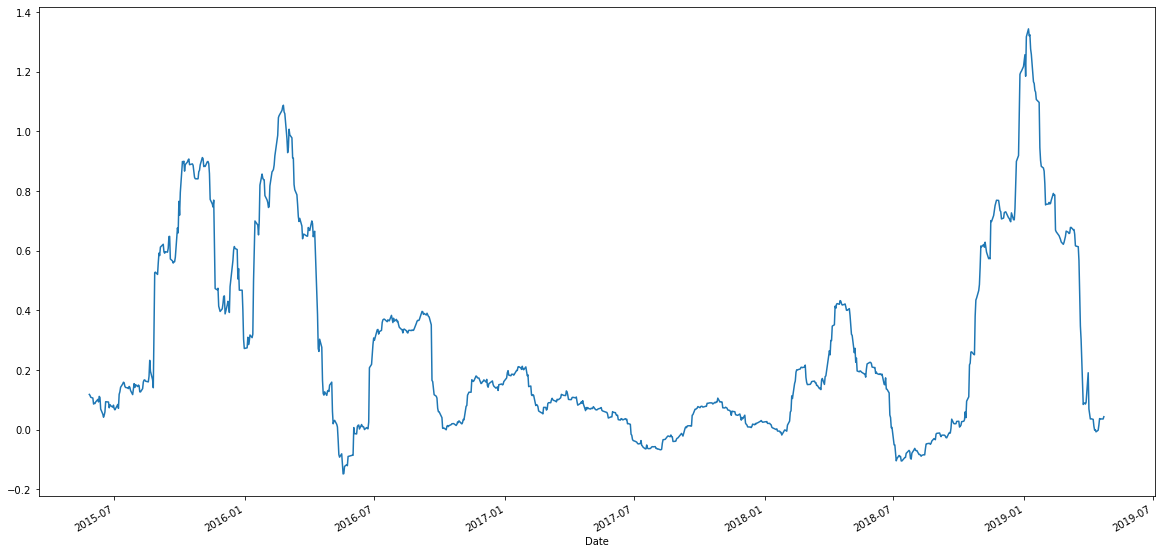

In [24]:
# Calculate covariance of a single portfolio
covariance = combined_returns_df["Algo 1"].rolling(window=60).cov(combined_returns_df["S&P 500"])

# Calculate variance of S&P 500
variance_sp = combined_returns_df["S&P 500"].var()

# Computing beta
beta = covariance/variance_sp

# Plot beta trend
beta.plot(figsize=(20,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

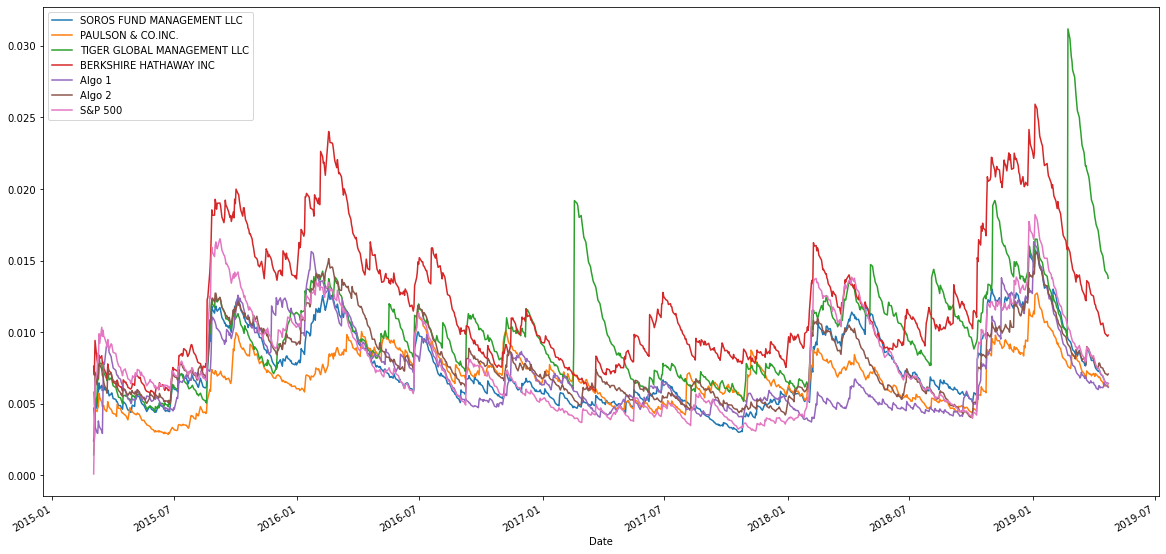

In [25]:
# Use `ewm` to calculate the rolling window
combined_returns_df.ewm(21).std().plot(figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_returns_df.mean()*252)/(combined_returns_df.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

<AxesSubplot:>

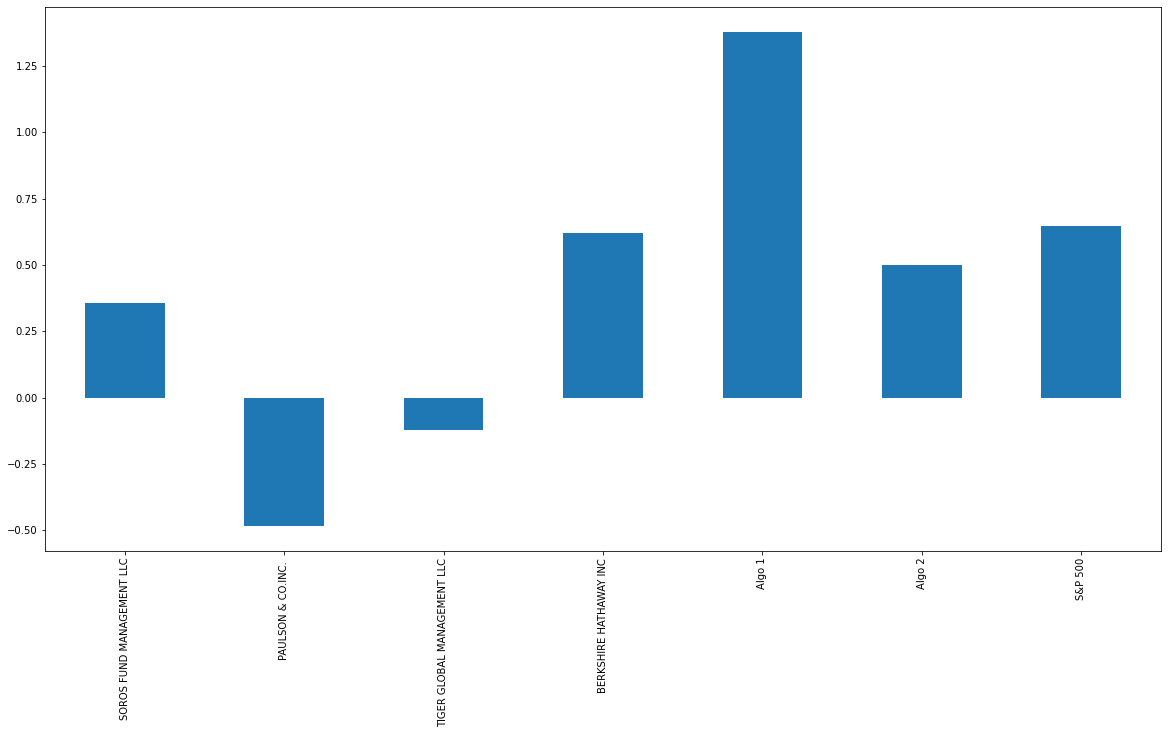

In [27]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(figsize=(20,10), kind="bar")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [28]:
#1st Stock: McDonalds - Fast food chain

# Reading data from 1st stock
csv_path = Path("../Starter_Code/Resources/MCD_historical.csv")

mcd_hist = pd.read_csv(csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
mcd_hist.sort_index(inplace=True)
mcd_hist = mcd_hist.drop(mcd_hist.columns[[0, 1, 2, 4, 5]], axis=1)
mcd_hist = mcd_hist.rename(columns={"Close": "MCD"})
mcd_hist


,MCD
Date,
2015-01-02,93.260002
2015-01-05,92.230003
2015-01-06,92.400002
2015-01-07,94.010002
2015-01-08,94.360001
...,...
2019-06-24,203.919998
2019-06-25,205.710007
2019-06-26,204.550003


In [29]:
# Reading data from 2nd stock

#Second Stock: Amazon - Online retailer
csv_path = Path("../Starter_Code/Resources/AMZN_historical.csv")

amzn_hist = pd.read_csv(csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
amzn_hist.sort_index(inplace=True)
amzn_hist = amzn_hist.drop(amzn_hist.columns[[0, 1, 2, 4, 5]], axis=1)
amzn_hist = amzn_hist.rename(columns={"Close": "AMZN"})
amzn_hist

,AMZN
Date,
2015-01-02,308.519989
2015-01-05,302.190002
2015-01-06,295.290009
2015-01-07,298.420013
2015-01-08,300.459991
...,...
2019-06-24,1913.900024
2019-06-25,1878.270020
2019-06-26,1897.829956


In [30]:
# Reading data from 3rd stock

#Third Stock: Lockheed Martin - Aerospace, defence, technology
csv_path = Path("../Starter_Code/Resources/LMT_historical.csv")

lmt_hist = pd.read_csv(csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
lmt_hist.sort_index(inplace=True)
lmt_hist = lmt_hist.drop(lmt_hist.columns[[0, 1, 2, 4, 5]], axis=1)
lmt_hist = lmt_hist.rename(columns={"Close": "LMT"})
lmt_hist

,LMT
Date,
2015-01-02,193.309998
2015-01-05,189.289993
2015-01-06,188.399994
2015-01-07,190.830002
2015-01-08,195.130005
...,...
2019-06-24,359.980011
2019-06-25,360.559998
2019-06-26,359.500000


In [31]:
# Reading data from 4th stock

# Fourth Stock: Activison Blizzard - Video game company
csv_path = Path("../Starter_Code/Resources/ATVI_historical.csv")

atvi_hist = pd.read_csv(csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
atvi_hist.sort_index(inplace=True)
atvi_hist = atvi_hist.drop(atvi_hist.columns[[0, 1, 2, 4, 5]], axis=1)
atvi_hist = atvi_hist.rename(columns={"Close": "ATVI"})
atvi_hist

,ATVI
Date,
2015-01-02,20.129999
2015-01-05,19.850000
2015-01-06,19.480000
2015-01-07,19.059999
2015-01-08,19.250000
...,...
2019-06-24,47.150002
2019-06-25,46.200001
2019-06-26,46.730000


In [32]:
# Reading data from 5th stock

# Fifth Stock: Nvidia - Computer systems design 
csv_path = Path("../Starter_Code/Resources/NVDA_historical.csv")

nvda_hist = pd.read_csv(csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
nvda_hist.sort_index(inplace=True)
nvda_hist = nvda_hist.drop(nvda_hist.columns[[0, 1, 2, 4, 5]], axis=1)
nvda_hist = nvda_hist.rename(columns={"Close": "NVDA"})
nvda_hist

,NVDA
Date,
2015-01-02,5.032500
2015-01-05,4.947500
2015-01-06,4.797500
2015-01-07,4.785000
2015-01-08,4.965000
...,...
2019-06-24,38.165001
2019-06-25,37.869999
2019-06-26,39.814999


In [33]:
# Combine all stocks in a single DataFrame
custom_combined_df = pd.concat([mcd_hist, amzn_hist, lmt_hist, atvi_hist, nvda_hist], axis = "columns", join = "inner")
custom_combined_df

,MCD,AMZN,LMT,ATVI,NVDA
Date,,,,,
2015-01-02,93.260002,308.519989,193.309998,20.129999,5.032500
2015-01-05,92.230003,302.190002,189.289993,19.850000,4.947500
2015-01-06,92.400002,295.290009,188.399994,19.480000,4.797500
2015-01-07,94.010002,298.420013,190.830002,19.059999,4.785000
2015-01-08,94.360001,300.459991,195.130005,19.250000,4.965000
...,...,...,...,...,...
2019-06-24,203.919998,1913.900024,359.980011,47.150002,38.165001
2019-06-25,205.710007,1878.270020,360.559998,46.200001,37.869999
2019-06-26,204.550003,1897.829956,359.500000,46.730000,39.814999


In [34]:
# Reset Date index
custom_combined_df.sort_index(ascending=False, inplace=True)
custom_combined_df

,MCD,AMZN,LMT,ATVI,NVDA
Date,,,,,
2019-06-28,207.660004,1893.630005,363.540009,47.200001,41.057499
2019-06-27,206.270004,1904.280029,359.089996,47.279999,40.807499
2019-06-26,204.550003,1897.829956,359.500000,46.730000,39.814999
2019-06-25,205.710007,1878.270020,360.559998,46.200001,37.869999
2019-06-24,203.919998,1913.900024,359.980011,47.150002,38.165001
...,...,...,...,...,...
2015-01-08,94.360001,300.459991,195.130005,19.250000,4.965000
2015-01-07,94.010002,298.420013,190.830002,19.059999,4.785000
2015-01-06,92.400002,295.290009,188.399994,19.480000,4.797500


In [35]:
# Reorganize portfolio data by having a column per symbol
# Didn't need to

In [36]:
# Calculate daily returns
daily_returns = custom_combined_df.pct_change()
# Drop NAs
daily_returns.dropna(inplace=True)
# Display sample data
daily_returns

,MCD,AMZN,LMT,ATVI,NVDA
Date,,,,,
2019-06-27,-0.006694,0.005624,-0.012241,0.001695,-0.006089
2019-06-26,-0.008339,-0.003387,0.001142,-0.011633,-0.024322
2019-06-25,0.005671,-0.010306,0.002949,-0.011342,-0.048851
2019-06-24,-0.008702,0.018970,-0.001609,0.020563,0.007790
2019-06-21,0.001667,-0.001358,-0.001722,-0.026299,-0.005896
...,...,...,...,...,...
2015-01-08,0.012338,0.011888,0.000564,0.018519,-0.004012
2015-01-07,-0.003709,-0.006790,-0.022037,-0.009870,-0.036254
2015-01-06,-0.017126,-0.010489,-0.012734,0.022036,0.002612


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [37]:
# Set weights
weights = [.20,.20,.20,.20,.20]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)

# Display sample data
portfolio_returns.head()

Date
2019-06-27   -0.003541
2019-06-26   -0.009308
2019-06-25   -0.012376
2019-06-24    0.007402
2019-06-21   -0.006722
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [38]:
# Join your returns DataFrame to the original returns DataFrame
combined_returns_df["Custom"]=portfolio_returns
combined_returns_df.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000958
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,-0.005837
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,-0.004763
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,-0.023213
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,0.000173


In [39]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_returns_df.isnull().sum()

combined_returns_df.dropna(inplace=True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [40]:
# Calculate the annualized `std`
combined_returns_df.std()*np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
Custom                         0.197358
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

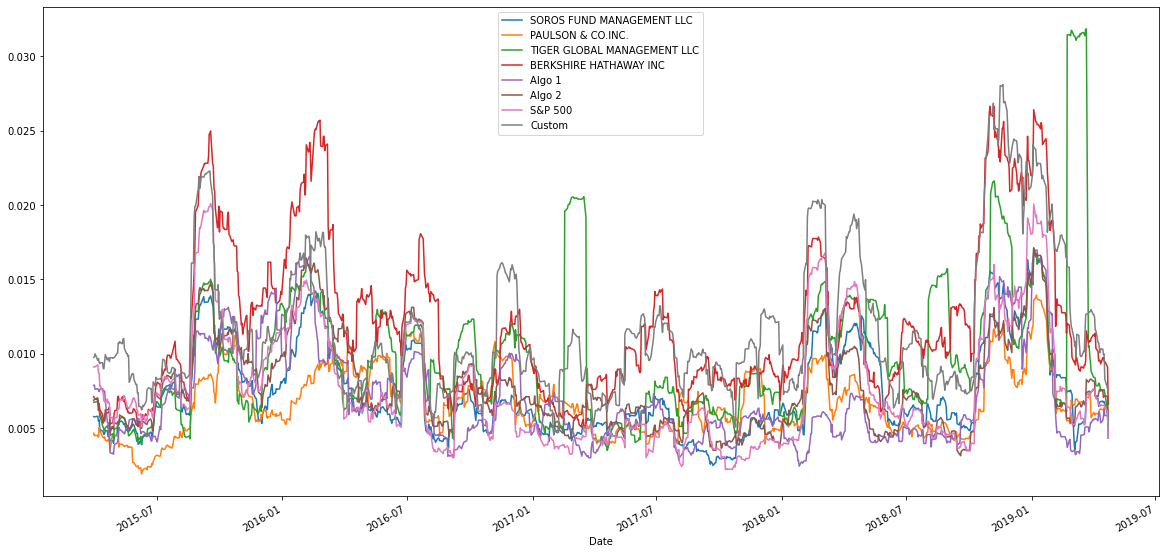

In [41]:
# Calculate rolling standard deviation
# Plot rolling standard deviation
combined_returns_df.rolling(window=21).std().plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

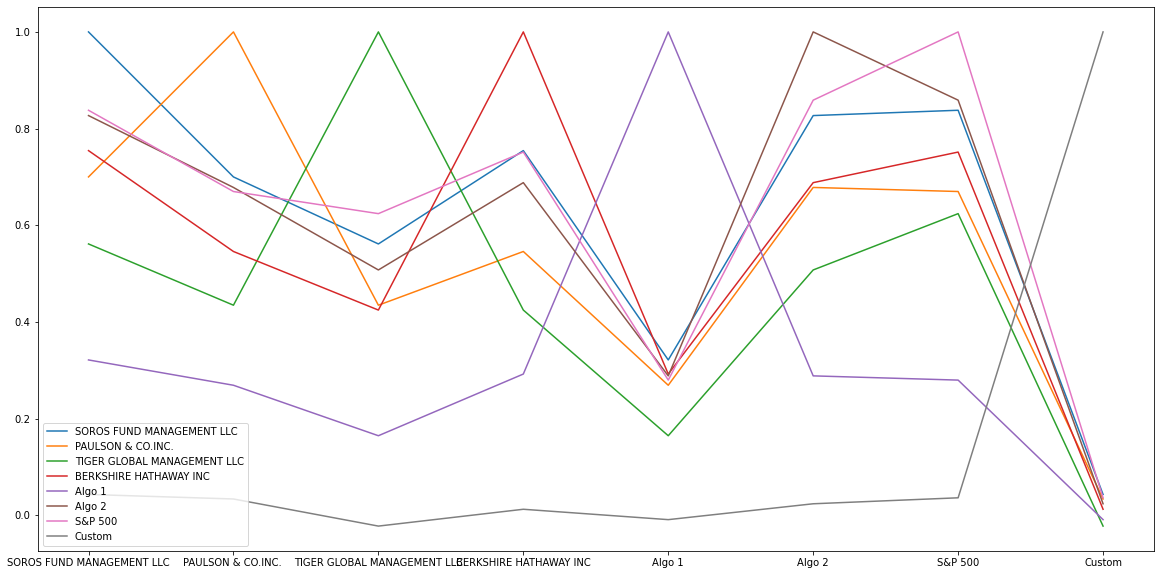

In [42]:
# Calculate the correlation
new_correlation_df = combined_returns_df.corr()
# Display de correlation matrix
new_correlation_df.plot(figsize=(20,10))

<AxesSubplot:>

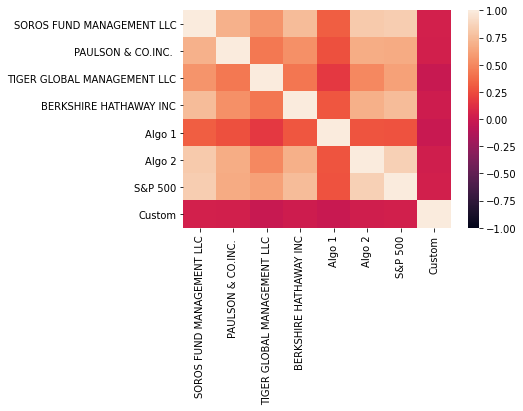

In [43]:
# Display with a heatmap
sns.heatmap(new_correlation_df, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:xlabel='Date'>

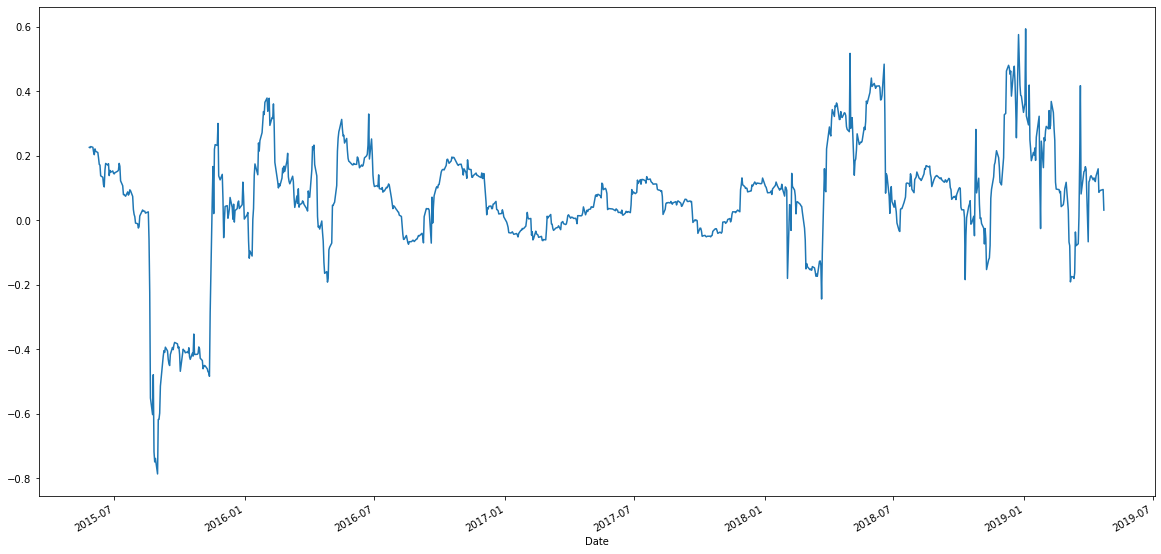

In [44]:
# Calculate and plot Beta
# Calculate covariance of a single portfolio
new_covariance = combined_returns_df["Custom"].rolling(window=60).cov(combined_returns_df["S&P 500"])

# Calculate variance of S&P 500
new_variance_sp = combined_returns_df["S&P 500"].var()

# Computing beta
new_beta = new_covariance/new_variance_sp

# Plot beta trend
new_beta.plot(figsize=(20,10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [45]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios = (combined_returns_df.mean()*252)/(combined_returns_df.std()*np.sqrt(252))

<AxesSubplot:>

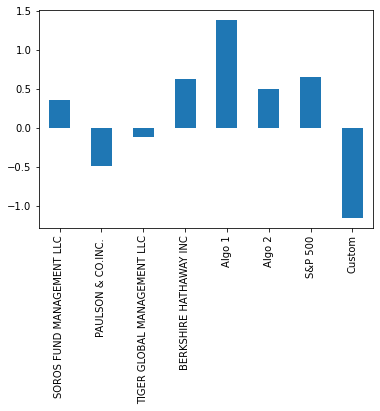

In [46]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

### How does your portfolio do?

Write your answer here!

The custom portfolio, in it's current does not correlate with any of the whale or algorythmic portfolios, or the S&P500. According to the sharpe ratio, compared with the other portfolios, the custom portfolio returns less reward per unit of volatility.